# **VEGAN SHOP**
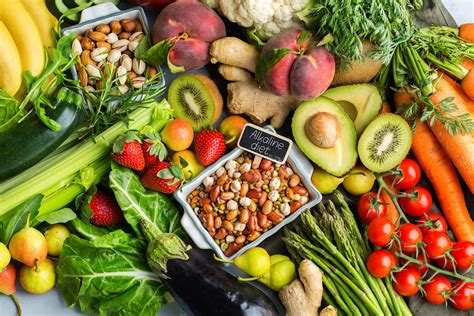

##**Importing modules**

In [ ]:
import os
import csv
from csv import reader
import pandas as pd
import shutil
import time

##**Creating Functions**

### **Create files to store data**

We create 2 different functions, one to rename files if they already exist ant the other to create new ones. 

Then we nest them in just one function that will check if a document already exists. 

If not, one of the two functions will be used depending on what the user wants to do.

In [ ]:
def rename_files(path):
  if os.path.exists(path):
    target = os.getcwd()+"/"+os.path.basename(path)
    shutil.move(r"path", r"target")
    new_name = os.getcwd()+"/"+"warehouse.csv"
    os.rename(r'target',r'new_name')
            
    with open("selling.csv","a",newline="") as file:
      csv_writer = csv.writer(file)
      csv_writer.writerow(["Name","Quantity","Time"])

    with open("profits.csv","a",newline="") as file:
     csv_writer = csv.writer(file)
     csv_writer.writerow(["Gross_profits($)","Net_profits($)"])
     csv_writer.writerow([0,0])

In [ ]:
def create_doc():
  
  with open("warehouse.csv","a",newline="") as file:
      csv_writer = csv.writer(file)
      fields = ["Name","Quantity","Purchase_price($)","Selling_price($)"]
      csv_writer.writerow(fields)
                
  with open("selling.csv","a",newline="") as file:
      csv_writer = csv.writer(file)
      csv_writer.writerow(["Name","Quantity","Time"])
                
  with open("profits.csv","a",newline="") as file:
      csv_writer = csv.writer(file)
      csv_writer.writerow(["Gross_profits($)","Net_profits($)"])
      csv_writer.writerow([0,0])

In [ ]:
def check_document():
    """
    Check that the file "warehouse" is present in the working directory to save information about the products.
    If not, there are 2 options:
    -create the csv file "warehouse" along with other two to store information about sales and profit
    -input a path 
    -enter a path where to search for a file on which to save the warehouse information, 
      which will be renamed "warehouse.csv" and moved to the working directory
    """
    
    path = os.getcwd()+"/warehouse.csv"  # Remember to use a backlash or a forwardlash according to your os
    
    while not os.path.exists(path):
        print("File containing warehouse data not found")
        command = str(input("Enter ""Yes"" to create a new document or enter a new path to search for an existing doc: "))
        
        if command == "Yes":
          create_doc() 
        else:
          rename_files(path=command) 

### **Create list of commands**

In [ ]:
def print_commands():
    """
    It provides a general guide to possible commands.    
    For convenience, commands can also be used simply by using numbers.
    """
    print("\n")
    print("(0)close: exit the programme")
    print("(1)sale: records a sale")
    print("(2)profits: shows total profits")
    print("(3)add: add a product to the warehouse")
    print("(4)list: lists products in the warehouse")    
    print("(5)help: show possible commands")
    print("(6)update sale price: change the sale price of a product")
    print("(7)update purchase price: change purchase price of a product")

### **Miscellaneous functions**

#### Checking functions

In [ ]:
def is_product_in_stock(product=None):
    """
    checks that a product is present in the warehouse
    returns 'True' if present, 'False' otherwise
    """
    if product == None:
      product = str(input("Product name: ")).strip().lower() 
    else:
      product = product.strip().lower()                               
    
    with open("warehouse.csv","r") as file:
        csvreader = csv.reader(file, delimiter=",")
        csvwriter = csv.writer(file, delimiter=",")
        for line in csvreader:
            if product in line:
                return True
    return False

In [ ]:
def is_price_lecit(selling_price,purchase_price):
    """
    It prevents a product from being registered with prices 
    that may cause an economic loss to the shop.
    """
    if (type(selling_price) not in [int,float] or     # Check if input of the function is valid
            type(purchase_price) not in [int,float]):    
      print("Prices must be numbers!")
      return 

    if selling_price<purchase_price:
      print("The selling price must be higher than the purchase price of the product!")
      return False
    else:
      return True

In [ ]:
def check_input(input_type,input_msg="Value: ", error_msg="Invalid value!"):
  """Make sure that the value is of a specific type,
  then return the input. 
  """
  
  value = None

  while not isinstance(value, input_type):    # Return True if type(value) != input_type
    try:
      value = input_type(input(input_msg))
    except:
      print(error_msg)

  return value

#### Removing products with quantity=0

In [ ]:
def remove_null_prod():
    """
    Removes a product from inventory 'warehouse.csv' if out of stock (quantity=0)
    """
    df = pd.read_csv("warehouse.csv")
    df = df.drop(index=df[df["Quantity"]==0].index)
    df.to_csv("warehouse.csv", index=False)

#### Modifying quantity

In [ ]:
def modif_quantity(product,quantity):
  """Modify the quantity of a product in stock. 

  If quantity is negative, then subtraction is performed, otherwise addition.
  In case of subtraction, if the quantity in stock < quantity, a warning of shortage is printed 
  and it's asked it the user wants to remove all the units in stock.

  """
  if not isinstance(quantity,int):
    quantity = check_input(input_type=int,input_msg="Quantity: ",error_msg="Quantity must be an integer")

  if not is_product_in_stock(product):                             
     print("The entered product is not in stock")
  
  else:
    df = pd.read_csv("warehouse.csv") 
    quantity_warehouse = df.loc[df["Name"]==product,"Quantity"]
    
    if quantity_warehouse < abs(quantity) and quantity < 0: 
      print("There are not enough units for this product") 
      decision = input(f"You want to sell the remaining stock({quantity_warehouse})?(Yes/No): ")
      
      if decision == "Yes":
        df.loc[df["Name"]==product,"Quantity"] -= quantity_warehouse
        df.to_csv("warehouse.csv", index=False)
    
    else:
      df.loc[df["Name"]==product,"Quantity"] += quantity
      df.to_csv("warehouse.csv", index=False)

    remove_null_prod()  # If the product quantity drops to 0, the product is removed

#### Update quantity, selling_price and purchase price at once

In [ ]:
def update_warehouse(product="",quantity=None,selling_price=None,purchase_price=None):
    """
    Allows any feature of a product in the warehouse to be updated.
    """

    if quantity != None:
      modif_quantity(product,quantity)

    if selling_price != None:
      update_selling_price(product,selling_price)

    if purchase_price != None:
      update_purchase_price(product,purchase_price)

    df = pd.read_csv("warehouse.csv")         
    print(df)
    print("\n")

#### Update selling record

In [ ]:
def update_selling_record(product=None,quantity=None):
    """
    Record the sale on selling.csv saving:
      -Product name
      -Quantity
      -Exact time when the sale occurred
    """

    if product == None:                                                 
        product = str(input("Product name: ")).strip().lower()
    else:
        product = product.strip().lower()

    if not isinstance(quantity,int):
      quantity = check_input(input_type=int,input_msg="Quantity: ",error_msg="Quantity must be an integer")
        
    if not is_product_in_stock(product):
        print("The entered product is not in stock")
    else:

        df = pd.read_csv("warehouse.csv") 
        quantity_warehouse = df.loc[df["Name"]==product,"Quantity"]              # Current quantity in stock
        purchase_price = df.loc[df["Name"]==product,"Purchase_price($)"]         # Purchase price of the product
        selling_price = df.loc[df["Name"]==product,"Selling_price($)"]           # Selling price of the product
        gross_profit = quantity*selling_price                                    # Computing the gross profit
        net_profit = gross_profit-purchase_price*quantity # Subtracting total purchase cost to gross profit 
                                                          # to get the net

        time = time.asctime(time.localtime(time.time()))  # Getting the timestamp of the transaction

        with open("selling.csv","a",newline="") as file:  # Updating the sales record
                    csv_writer = csv.writer(file)
                    fields = [product, quantity, time]
                    csv_writer.writerow(fields)

        df_profits = pd.read_csv("profits.csv")                                         
        df_profits["Gross_profits($)"][0] += gross_profit  # Updating gross profit
        df_profits["Net_profits($)"][0] += net_profit      # Updating net profit
        df_profits.to_csv("profits.csv", index=False)

### **Creating the commands**

#### Listing Products

In [ ]:
def list_prod():
  with open("warehouse.csv", "r") as file:
    csv_reader = reader(file)
    for i in csv_reader:
      print(i)

#### Printing Profits

In [ ]:
def print_profits():
    
    """
    Prints the shop's gross and net profits on one line.
    By default they are both equal to 0 and are changed from the first sale.
    """
    
    df_profits = pd.read_csv("profits.csv") 
    gross = df_profits["Gross_profits($)"][0]
    net = df_profits["Net_profits($)"][0]
    print(f"Profit: gross={gross}$, net={net}$")

#### Selling products

In [ ]:
def sell_product():
    """
    Make a sale and keep track of it on various documents.
    """
    sell = "Yes"  # Default value assume the user wants to sell at least one product
    shopping_list = []         
    total = 0     # Total gross sales revenue
    
    while sell=="Yes":
        product = str(input("Product Name: ")).strip().lower()           
        if not is_product_in_stock(product):                             
            print("The entered product is not in stock")
            sell = str(input("Add another product (Yes/No): ")).strip()  
        else:
            quantity = check_input(input_type=int,
                                   input_msg="Quantity: ",
                                   error_msg="Quantity must be an integer")
            update_selling_record(product,quantity)                      
            df = pd.read_csv("warehouse.csv")
            Selling_price = df.loc[df["Name"]==product,"Selling_price($)"]
            shopping_list.append((product,quantity,Selling_price)) # Adding products to the shopping list
            update_warehouse(product,-quantity)
            
            sell = str(input("Add another product (Yes/No): ")).strip()                       

    if len(shopping_list):       # Check if shopping list is not empty
        print("SALE RECORDED!")  # Then print a message to confirm the sale          

        for i in shopping_list:  
            print("-",i[0],"x",i[1])
            total += i[2]*i[1]
        print("Total: ",total,"$") 

#### Adding products

In [ ]:
def add_product():
    """
    Adds a product to the warehouse with the following characteristics:
    -Product name
    -Quantity
    -Sale price
    -Purchase price
    If the product is already present, it adds units to those already present.
    """
    product = str(input("Product name: ")).strip().lower()          
    quantity = check_input(input_type=int,input_msg="Quantity: ",error_msg="Quantity must be an integer")
    
    if is_product_in_stock(product):
        modif_quantity(product,quantity)
    else:
        price_lecit = False
        while not price_lecit:
            selling_price = check_input(input_type=float,
                                        input_msg="Selling price: ",
                                        error_msg="Selling price must be a number")                 
            purchase_price = check_input(input_type=float,
                                         input_msg="Purchase price: ",
                                          error_msg="Purchase price must be a number")
            price_lecit = is_price_lecit(selling_price,purchase_price) 
                
        with open("warehouse.csv","a",newline="") as file:
            csv_writer = csv.writer(file)
            fields = [product, quantity, purchase_price, selling_price]
            csv_writer.writerow(fields)

#### Update Selling Price

In [ ]:
def update_selling_price(product=None,selling_price=None):
  
  if product == None:
    product = str(input("Product name: ")).strip().lower()  
  else:
    product = product.strip().lower()    
  
  if not isinstance(selling_price,float):
    selling_price = check_input(input_type=float,
                                input_msg="Selling price: ",
                                error_msg="Selling price must be a number")

  if not is_product_in_stock(product):                            
     print("The entered product is not in stock")
  else:
    df = pd.read_csv("warehouse.csv") 
    if df.loc[df["Name"]==product,"Purchase_price($)"].item() < selling_price:
      df.loc[df["Name"]==product,"Selling_price($)"] = selling_price
      df.to_csv("warehouse.csv", index=False)
      print("Selling price updated")
    else:
      print("The selling price must be higher than the purchase price of the product!")

#### Update Purchase Price

In [ ]:
def update_purchase_price(product=None,purchase_price=None):
  
  if product == None:
    product = str(input("Product name: ")).strip().lower()   
  else:
    product = product.strip().lower()

  if not isinstance(purchase_price,float):
    purchase_price = check_input(input_type=float,
                                 input_msg="Purchase price: ",
                                 error_msg="Purchase price must be a number")
    
  if not is_product_in_stock(product):                            
    print("The entered product is not in stock")
  
  else:
    df = pd.read_csv("warehouse.csv") 
    if df.loc[df["Name"]==product,"Selling_price($)"].item() > purchase_price:
      df.loc[df["Name"]==product,"Purchase_price($)"] = purchase_price
      df.to_csv("warehouse.csv", index=False)
      print("Prezzo di acquisto aggiornato")
    else:
      print("The selling price must be higher than the purchase price of the product!")

## Merging functions in one

In [ ]:
def software_warehouse():
    
    check_document()
    
    print("Hi, if you don't know where to start type: help(5)")
    
    cmd = input("Enter a command: ")
    while cmd!="close" and cmd!="0":

        if cmd=="sale" or cmd=="1":                 
            sell_product()
            cmd = input("Enter a command: ")
        elif cmd=="profits" or cmd=="2":
            print_profits()
            cmd = input("Enter a command: ")
        elif cmd=="add" or cmd=="3":             
            add_product()
            cmd = input("Enter a command: ")
        elif cmd=="list" or cmd=="4":
            list_prod()
            cmd = input("Enter a command: ")
        elif cmd=="help" or cmd=="5":
            print_commands()
            cmd = input("Enter a command: ")
        elif cmd =="update sale price" or cmd=="6":                  
            product = str(input("Product name: ")).strip().lower()
            if not is_product_in_stock(product):                              
                print("The entered product is not in stock")
            else:
                price_lecit = False
                while not price_lecit: # Check for serious errors in the price change
                    
                    check_input(input_type=int,input_msg="Purchase price: ",error_msg="Purchase price must be a number")
                    new_price = float(input("New selling price: "))
                    df = pd.read_csv("warehouse.csv") 
                    purchase_price = float(df.loc[df["Name"]==product,"Purchase_price($)"])
                    price_lecit = is_price_lecit(new_price, purchase_price) 

                update_selling_price(product,Selling_price=new_price)    
            cmd = input("Enter a command: ")
        
        elif cmd =="update purchase price" or cmd=="7":                 
            product = str(input("Product name: ")).strip().lower() 
            if not is_product_in_stock(product):
                print("The entered product is not in stock")
            else:
                price_lecit = False
                while not price_lecit:                
                    new_price = float(input("New purchase price: "))
                    df = pd.read_csv("warehouse.csv") 
                    selling_price = float(df.loc[df["Name"]==product,"Selling_price($)"])
                    price_lecit = is_price_lecit(selling_price,new_price) 

                update_purchase_price(product,Purchase_price=new_price)
            cmd = input("Enter a command: ")
        
        else:
            print("Invalid command")
            cmd = input("Enter a command: ")
   
    print("Bye bye")